In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import scipy
from scipy import stats
from scipy.optimize import minimize 
from scipy.optimize import least_squares
from scipy.optimize import curve_fit

# Segundo trabajo de Análisis Numérico: La expansión acelerada del Universo

## Constante de Hubble 

**1. La siguiente lista incluye las observaciones originales utilizadas por Hubble en 1929**

In [39]:
data1 = pd.read_csv('/media/guerrerohdsp/TOSHIBA EXT/Universidad/Master/Semester_II/\
        Numerics_Methods/Taller2/Hubble-1929.csv')
data1.head(5)

,Object,Dist. (Mpc),Vd. (Km/s)
0,SMC,0.032,170
1,LMC,0.034,290
2,6822,0.214,-130
3,598,0.263,-70
4,221,0.275,-185


A partir de los datos anteriores se realiza el ajuste a una linea recta para encuentrar la constante de Hubble estimada en 1929 

In [40]:
x1 = data1['Dist. (Mpc)'].values
y1 = data1['Vd. (Km/s)'].values
Hubble1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1,y1)

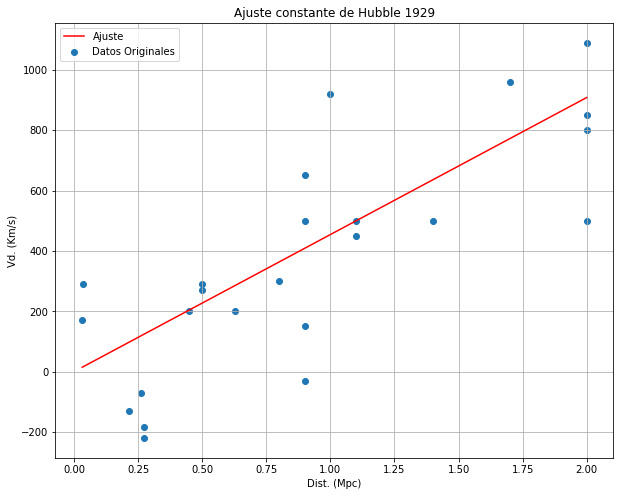

Constante de Hubble en 1929:  454.15844092262836


In [41]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x1,y1,label='Datos Originales')
plt.plot(x1,x1*Hubble1,'r',label='Ajuste')
plt.xlabel('Dist. (Mpc)')
plt.ylabel('Vd. (Km/s)')
plt.title('Ajuste constante de Hubble 1929')
plt.legend()
plt.grid()
plt.show()
print('Constante de Hubble en 1929: ', Hubble1)

**2. Humason calculó de nuevo la constante de Hubble en 1936 gracias al avistamiento de más galaxias**

A partir de los datos anteriores se realiza el ajuste a una linea recta para encuentrar la constante de Hubble estimada en 1936

In [42]:
data2 = pd.read_csv('/media/guerrerohdsp/TOSHIBA EXT/Universidad/Master/Semester_II/\
        Numerics_Methods/Taller2/Hubble-1936.csv')
data2.head(5)

,Clúster,Dist. (Mpc),Vd. (Km/s)
0,Virgo,1.6,890
1,Pegasus,6.8,3810
2,Pisces,8.3,4630
3,Cancer,8.6,4820
4,Perseus,9.4,5230


In [43]:
x2 = data2['Dist. (Mpc)'].values
y2 = data2['Vd. (Km/s)'].values
Hubble2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2,y2)

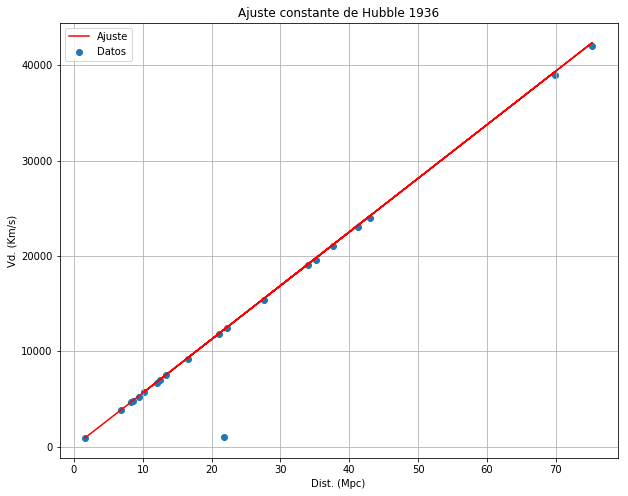

Constante de Hubble en 1936:  562.5446079059137


In [44]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x2,y2,label='Datos')
plt.plot(x2,x2*Hubble2,'r',label='Ajuste')
plt.xlabel('Dist. (Mpc)')
plt.ylabel('Vd. (Km/s)')
plt.title('Ajuste constante de Hubble 1936')
plt.legend()
plt.grid()
plt.show()
print('Constante de Hubble en 1936: ', Hubble2)

Uniendo los datos de 1929 con los de 1936 se obtiene el siguiente ajuste 

In [45]:
x3 = np.concatenate((x1,x2),axis=0);
y3 = np.concatenate((y1,y2),axis=0);
Hubble3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(x3,y3)

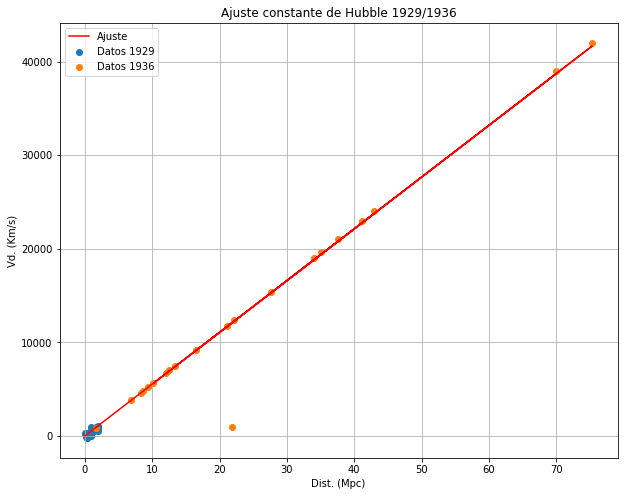

Constante de Hubble hasta 1936:  553.155606761207


In [46]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x1,y1,label='Datos 1929')
plt.scatter(x2,y2,label='Datos 1936')
plt.plot(x3,x3*Hubble3,'r',label='Ajuste')
plt.xlabel('Dist. (Mpc)')
plt.ylabel('Vd. (Km/s)')
plt.title('Ajuste constante de Hubble 1929/1936')
plt.legend()
plt.grid()
plt.show()
print('Constante de Hubble hasta 1936: ', Hubble3)

**3. Estimación de la Constante Hubble con datos más actuales**

In [47]:
data3 = pd.read_csv('/media/guerrerohdsp/TOSHIBA EXT/Universidad/Master/Semester_II/\
        Numerics_Methods/Taller2/Hubble-actual.csv')
data3.head(5)

,Dist. (Mpc),Vd. (Km/s)
0,15,1100
1,97,6700
2,32,2400
3,145,10700
4,50,3100


In [48]:
x4 = data3['Dist. (Mpc)'].values
y4 = data3['Vd. (Km/s)'].values
Hubble4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(x4,y4)

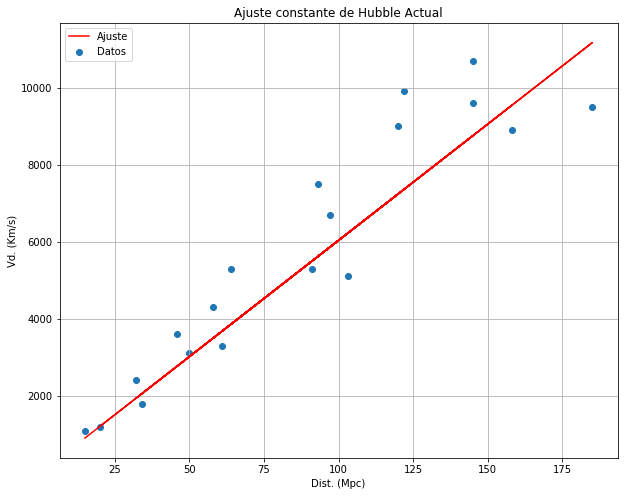

Constante de Hubble actual:  60.34548550996037


In [49]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x4,y4,label='Datos')
plt.plot(x4,x4*Hubble4,'r',label='Ajuste')
plt.xlabel('Dist. (Mpc)')
plt.ylabel('Vd. (Km/s)')
plt.title('Ajuste constante de Hubble Actual')
plt.legend()
plt.grid()
plt.show()
print('Constante de Hubble actual: ', Hubble4)

La constante de Hubble con datos más actuales de galaxias fue calculada, 
la cual es cerca al valor más aceptado en la actualidad. 
Finalmente de acuerdo a cada uno de los valores encontrados para 
la constante de Hubble se encontró la edad del universo estimada 
para cada época. 

In [50]:
conv = 3.086e+19
tiempo1 = (conv/Hubble1)/(3.154e+7)
tiempo2 = (conv/Hubble2)/(3.154e+7)
tiempo3 = (conv/Hubble3)/(3.154e+7)
tiempo4 = (conv/Hubble4)/(3.154e+7)
print('Tiempo estimado del universo 1929:',tiempo1/1e+6)
print('Tiempo estimado del universo 1936:',tiempo2/1e+6)
print('Tiempo estimado del universo 1929/1936:',tiempo3/1e+6)
print('Tiempo estimado del universo con datos actuales:',tiempo4/1e+6)

Tiempo estimado del universo 1929: 2154.402490254582
Tiempo estimado del universo 1936: 1739.3110916770077
Tiempo estimado del universo 1929/1936: 1768.8333339378662
Tiempo estimado del universo con datos actuales: 16213.973055736737


En 1929 era conocida la edad de algunos aglomerados globurales, la cual era del orden de 9000 millones de años. Sin embargo, para esa época la edad del universo estimada era de 2154 millones de años aproximadamente, la cual era menor a la edad de los aglomerados. Es decir, que la constante encontrada por Hubble en esa época  no fue una buena estimación de la edad del universo. 

##  Compilación de Supernovas Tipo IA

**4. Supernovas tipo IA a bajos y altos redshifts**

In [51]:
data_S = pd.read_csv('/media/guerrerohdsp/TOSHIBA EXT/Universidad/Master/Semester_II/\
        Numerics_Methods/Taller2/supernovas.csv')
data_S.head(5)

,Objeto,Redshift,Distancia,error_distancia
0,1993ah,0.028488,35.346583,0.223906
1,1993ag,0.050043,36.682368,0.166829
2,1993o,0.052926,36.817691,0.155756
3,1993b,0.070086,37.446737,0.158467
4,1992bs,0.062668,37.483409,0.156099


In [52]:
z = data_S['Redshift'].values   
D =  data_S['Distancia'].values
err =  data_S['error_distancia'].values

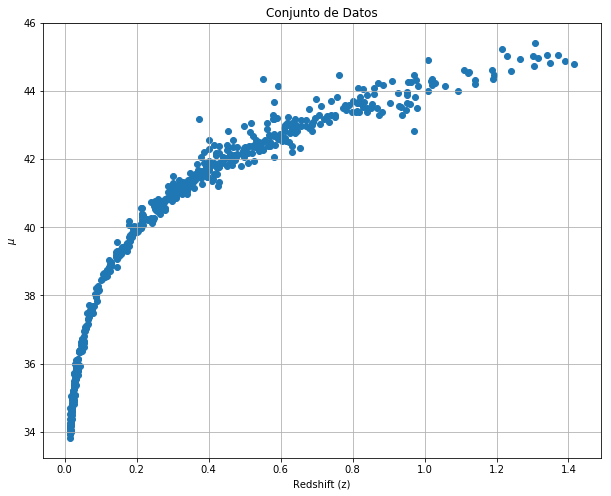

In [53]:
fig = plt.figure(figsize=(10,8))
plt.scatter(z,D)
plt.xlabel('Dist. (Mpc)')
plt.ylabel('Vd. (Km/s)')
plt.title('Conjunto de Datos')
plt.xlabel('Redshift (z)')
plt.ylabel('$\mu$')
plt.grid()
plt.show()

**5. punto**

In [54]:
# Esta función calcula el argumento de la integral donde z corresponde al redshift
def argumento(z,Omega_M,Omega_L,Omega_K):
    return 1/np.sqrt(Omega_M*(1+z)**3+Omega_L+Omega_K*(1+z)**2)

# Esta función resuelve la integral por el método de simpson donde a y b corresponden 
# a los límites de la integral 
def integral_simpson(a,b,Omega_M,Omega_L,Omega_K):
    tramos = 1000
    h = (b-a)/tramos
    x = a
    area = 0
    for i in range(0,tramos,2):
        deltaA =(h/3)*(argumento(x,Omega_M,Omega_L,Omega_K)+\
                       4*argumento(x+h,Omega_M,Omega_L,Omega_K)+\
                       argumento(x+2*h,Omega_M,Omega_L,Omega_K))  
        
        area = area + deltaA
        x = x + 2*h
    return area 

# Esta función calcula la distancia luminosa asociada a cada redshift de acuerdo 
# a la cantidad de materia y energía que exista en el universo 
def distancia_luminosa(z,Omega_M,Omega_L,Omega_k,Hubble):
    c = 3e+5
    I = integral_simpson(0,z,Omega_M,Omega_L,Omega_k)
    if(Omega_M+Omega_L>1):  #-- > condición 1 
        D = ((1+z)*c/Hubble)*(1/np.sqrt(np.abs(Omega_k)))*\
            np.sin(np.sqrt(np.abs(Omega_k))*I)
        
    elif(Omega_M+Omega_L==1): #-- > condición 2
        D = ((1+z)*c/Hubble)*I
        
    elif(Omega_M+Omega_L<1): #-- > condición 3
        D = ((1+z)*c/Hubble)*(1/np.sqrt(np.abs(Omega_k)))*\
            np.sinh(np.sqrt(np.abs(Omega_k))*I)
        
    return D

# cálculo de la función mu 
def funcion_mu(Dl):
    return 5*np.log10(Dl)+25

El siguiente gráfico muestra el modelo teórico esperado para un universo sin energía oscura, un universo con exceso de energía oscura y el modelo estandar de un universo plano. 

In [58]:
Omega_M = [0.3,0.3,0.28]
Omega_L = [0,1.0,0.72]
Omega_K = [0.7,-0.3,0]
Dl = np.zeros((3,len(z)))

for i in np.arange(0,3):
    for j in np.arange(0,len(z)):
        Di = distancia_luminosa(z[j],Omega_M[i],Omega_L[i],Omega_K[i],68)
        Dl[i,j]= Di

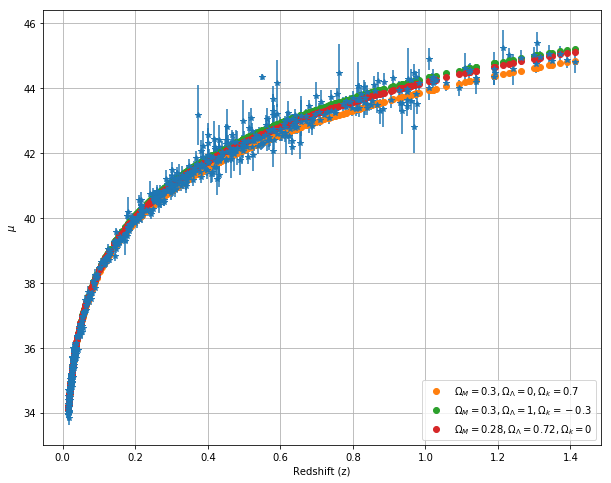

In [59]:
fig =  plt.figure(figsize=(10,8))
plt.errorbar(z,D,yerr=err,fmt='*')

plt.plot(z,funcion_mu(Dl[0,:]),'o',\
         label = '$\Omega_{M}=0.3,\Omega_{\Lambda}=0,\Omega_{k}=0.7$')

plt.plot(z,funcion_mu(Dl[1,:]),'o',\
        label = '$\Omega_{M}=0.3,\Omega_{\Lambda}=1,\Omega_{k}=-0.3$')

plt.plot(z,funcion_mu(Dl[2,:]),'o',\ 
         label = '$\Omega_{M}=0.28,\Omega_{\Lambda}=0.72,\Omega_{k}=0$')

plt.legend(loc='lower right')
plt.xlabel('Redshift (z)')
plt.ylabel('$\mu$')
plt.grid()
plt.show()

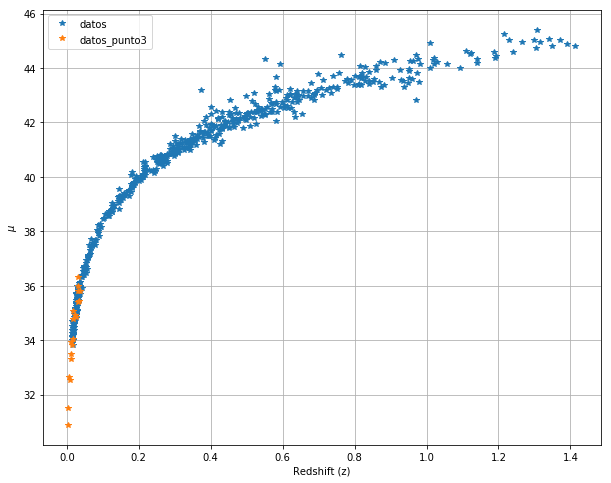

In [264]:
# velocidad de la luz
c = 3e+5 
# Redshift del punto 3
zp3 = y4/c 
# mu del punto 3 
mup3 = funcion_mu(x4)

fig =  plt.figure(figsize=(10,8))
plt.plot(z,D,'*',label='datos')
plt.plot(zp3,mup3,'*',label= 'datos_punto3')

plt.legend(loc='lower right')
plt.xlabel('Redshift (z)')
plt.ylabel('$\mu$')
plt.legend()
plt.grid()

**6. Un mejor ajuste para los parámetros cosmológicos mediante una minimización del error cuadrático**

In [57]:
# La función retorna el residuo cuadrático con sigma = err 
def funcion_objetivo(x):
    Omega_M = x[0]
    Omega_L = x[1]
    Omega_K = 1-Omega_M-Omega_L # se calcula Omega_k de acuerdo a 
    # la condición que los parámetros cosmólogicos deben sumar 1. 
    global z,D,err
    if (Omega_L-4/3*Omega_M<1 and Omega_L-3/2*Omega_M>-4.5 and \
            0<Omega_M<3 and -3<Omega_L<3): # condiciones
        
        # llamado de la función para calcular la distancia luminosa 
        Dl = distancia_luminosa(z,Omega_M,Omega_L,Omega_K,68)  
        mu = funcion_mu(Dl) # llamado de la función mu 
        # cálculo del residuo cuadrático
        return np.sum(np.multiply((mu-D)**2,1/err**2),axis=0) 
    else:
        return 1e+6   # si no cumple la condición retorna un 
        #residuo cudrático alto 

In [117]:
# La solución corresponde a la minimización por mímimos cuadrados 
# con parametros de entrada la función 
# objetivo y el punto (Omega_M, Omega_L)

sol = least_squares(funcion_objetivo, np.array([0.3,1.2]))
print('Residuo cuadrático para O_M=0.3 y O_Lambda=1.2: ',\
      funcion_objetivo(sol.x))

Residuo cuadrático para Omega_M=0.3 y Omega_Lambda=1.2:  909.2582287730538


In [71]:
# Cálculo de los parámetros cosmológicos con el mejor ajuste 
print('Omega M = ',sol.x[0])
print('Omega Lambda = ',sol.x[1])
print('Omega K = ',1-sol.x[0]-sol.x[1])
print('error  = ',funcion_objetivo(np.array([sol.x[0],sol.x[1]])))

Omega M =  0.1219677364592595
Omega Lambda =  0.36980641603431824
Omega K =  0.5082258475064223
error  =  909.2582287730538


In [66]:
# Nuevo ajuste de la distancia de luminosidad a partir de los 
# parámetros cosmológicos estimados anteriormente
Dist = []
for i in np.arange(0,len(z)):
    # llamado de la función para calcular la distancia luminosa
    Di = distancia_luminosa(z[i],sol.x[0],sol.x[1],1-sol.x[0]-sol.x[1],68) 
    Dist.append(Di)

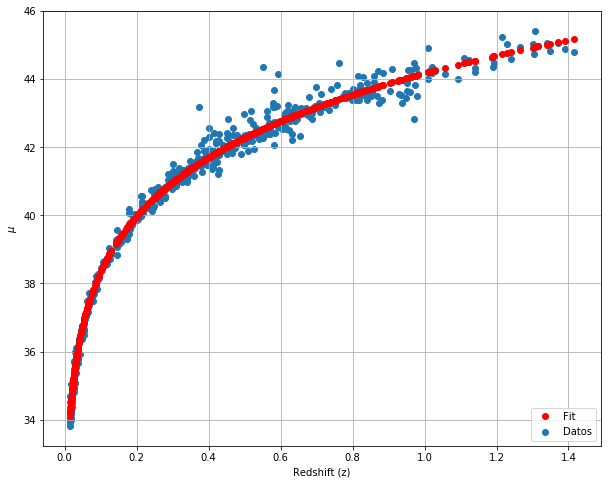

In [70]:
fig =  plt.figure(figsize=(10,8))
plt.scatter(z,D,label='Datos')
plt.plot(z,funcion_mu(Dist),'or',label='Fit')
plt.xlabel('Redshift (z)')
plt.ylabel('$\mu$')
plt.grid()
plt.legend(loc='lower right')

## Rutina Monte-Carlo

**7. Recalcular los mejores parámetros cosmológicos mediante una rutina de Monte-Carlo**

La siguiente rutina calcula los mejores parámetros cosmológicos mediante una rutina de Monte-Carlo con un punto inicial aleatorio.  Para encontrar una solución más contundente se realizan tres pruebas donde el punto de inicio es distinto (aleatorio) y con paso constante de 0.05

In [72]:
def Mcarlo(a,b,itera,paso):
    x = np.array([a,b])             # punto incial
    err_Ref = funcion_objetivo(x)   # residuo cuadrático (error) para el punto incial
    solx = []
    soly = []
    for i in np.arange(1,itera):
        # El siguiente punto se escoge en el punto incial mas un paso
        x[0] = np.random.uniform(a - paso,a + paso)   
        x[1] = np.random.uniform(b - paso,b + paso)
        while True:   # -- > esta condición garantiza que 
                      # al movernos en un paso no nos salgamos de límites
            x[0] = np.random.uniform(a-paso,a + paso)
            x[1] = np.random.uniform(b-paso,b + paso)
            if (0 < x[0] < 3) and (-3 < x[1] < 3): # una vez se garantiza que 
                # el nuevo punto está entre los
                # límites se termina el while 
                break

        err2 = funcion_objetivo(x) # nuevo error 
        if(err2 < err_Ref):  # si el nuevo error es menor que 
            # el anterior actualizamos el punto inicial 
            err_Ref = err2
            a = x[0]
            b = x[1]
            solx.append(a)
            soly.append(b)
        else:   # si no debemos tomar la decisión de acuerdo a una probabilidad
            s = np.random.binomial(1, 0.8)  # 80% de probabilidad de salir uno. 
            if (s!=1):   # si es cero escogemos el nuevo punto , 
                # si no nos quedamos en el anterior
                err_Ref = err2
                a = x[0]
                b = x[1]
                solx.append(a)
                soly.append(b)
                
    return solx, soly , err_Ref

In [73]:
# Test 1

itera = 1000  # número de iteraciones
paso = 0.05   # Paso

a = np.random.uniform(0,3)
b = np.random.uniform(-3,3)
Om1, OL1, ERR1 = Mcarlo(a,b,itera,paso)

In [74]:
# Test 2

a = np.random.uniform(0,3)
b = np.random.uniform(-3,3)
Om2, OL2, ERR2 = Mcarlo(a,b,itera,paso)

In [75]:
# Test 3

a = np.random.uniform(0,3)
b = np.random.uniform(-3,3)
Om3, OL3, ERR3 = Mcarlo(a,b,itera,paso)

In [113]:
print('Test 1: ','Omega_M= ',Om1[len(Om1)-1],'Omega_L= ',OL1[len(OL1)-1])
print('Test 2: ','Omega_M= ',Om2[len(Om2)-1],'Omega_L= ',OL2[len(OL2)-1])
print('Test 3: ','Omega_M= ',Om3[len(Om3)-1],'Omega_L= ',OL3[len(OL3)-1])

print('Err 1= ',ERR1)
print('Err 2= ',ERR2)
print('Err 3= ',ERR3)

Test 1:  Omega_M=  1.0426120326569808 Omega_L=  -0.5735546602922431
Test 2:  Omega_M=  0.11415092965299276 Omega_L=  0.3653236273828364
Test 3:  Omega_M=  0.15539385489279328 Omega_L=  0.41023855063148423
Err 1=  3008.0555485786363
Err 2=  909.2934236221984
Err 3=  909.4811217264769


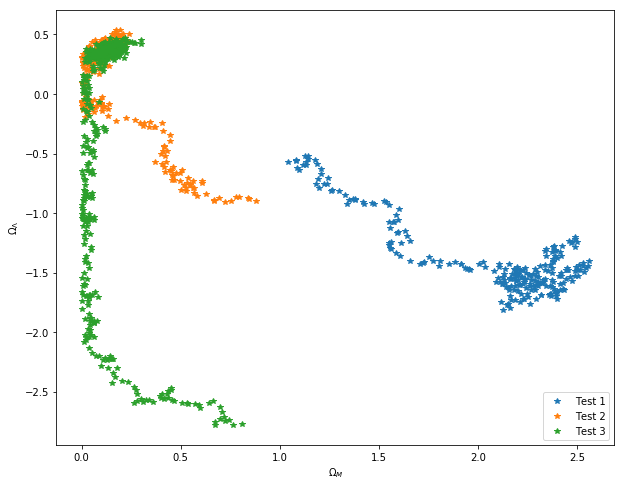

In [77]:
fig =  plt.figure(figsize=(10,8))
plt.plot(Om1,OL1,'*',label = 'Test 1')
plt.plot(Om2,OL2,'*',label = 'Test 2')
plt.plot(Om3,OL3,'*',label = 'Test 3')
plt.xlabel('$\Omega_{M}$')
plt.ylabel('$\Omega_{\Lambda}$')
plt.legend(loc='lower right')

De acuerdo a los resultados obtenidos por la rutina de Monte-Carlo podemos notar que el resultado más parecido al punto anterior corresponde al test 2 con un error alrededor de 909. 

**8. Comportamiento del residuo cuadrático**

In [78]:
# Valores en el eje x (Omega_M) de 0 a 3 con un muestreo de 0.1 
x1 = np.arange(0,3,0.1)    
# Valores en el eje y (Omega_M) de -3 a 3 con un muestreo de 0.1
x2 = np.arange(-3,3,0.1)    

V1 = np.matlib.repmat(x1, len(x2), 1).transpose()
V2 = np.matlib.repmat(x2, len(x1), 1)
Om = np.ravel(V1)
OL = np.ravel(V2)

con1 = OL-4/3*Om < 1   # condición de NO BIG BANG  
con2 = OL-3/2*Om > -4.5  # condición de < 9.6 Gyr

gridx = np.ravel(V1)*con1*con2
gridy = np.ravel(V2)*con1*con2

Text(0,0.5,'$\\Omega_{\\Lambda}$')

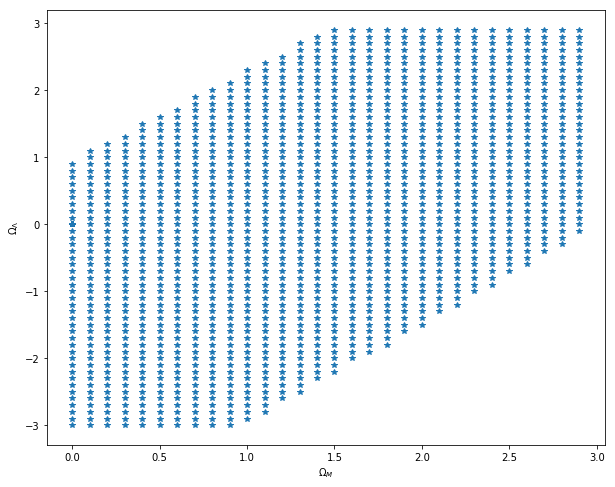

In [79]:
# Espacio de parámetros a tener encuenta

fig =  plt.figure(figsize=(10,8))
plt.plot(gridx,gridy,'*')
plt.xlabel('$\Omega_{M}$')
plt.ylabel('$\Omega_{\Lambda}$')

In [80]:
# Construcción de la matriz del residuo cuadrático

chi = np.zeros([len(x2),len(x1)])
for i in np.arange(len(x2)): # iteración a lo largo de Omega_L 
    for j in np.arange(len(x1)): # iteración a lo largo de Omega_m
        chi[i,j] = funcion_objetivo(np.array([x1[j],x2[i]])) 

In [81]:
chi2 = chi/np.min(chi) # normalización del residuo cuadrático

# intervalos de confianza 
int1 = np.where(chi2 < (np.min(chi2) + 2.3))    # intervalo del 68.3%
int2 = np.where(chi2 < (np.min(chi2) + 4.61))   # intervalo del 90%
int3 = np.where(chi2 < (np.min(chi2) + 6.17))   # interavalo del 958.4%
int4 = np.where(chi2 < (np.min(chi2) + 9.21))   # intervalo del 99% 

Text(0,0.5,'$\\Omega_{\\Lambda}$')

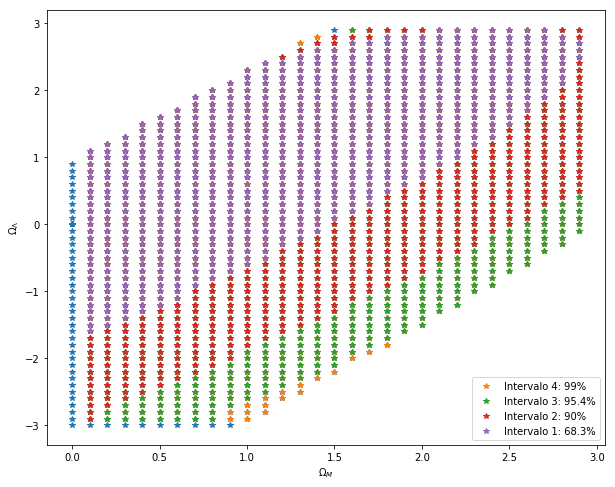

In [82]:
fig =  plt.figure(figsize=(10,8))
plt.plot(gridx,gridy,'*')
plt.plot(V1[int4[1],int4[0]],V2[int4[1],int4[0]],'*',label='Intervalo 4: 99%')
plt.plot(V1[int3[1],int3[0]],V2[int3[1],int3[0]],'*',label='Intervalo 3: 95.4%')
plt.plot(V1[int2[1],int2[0]],V2[int2[1],int2[0]],'*',label='Intervalo 2: 90%')
plt.plot(V1[int1[1],int1[0]],V2[int1[1],int1[0]],'*',label='Intervalo 1: 68.3%')

plt.legend(loc='lower right')
plt.xlabel('$\Omega_{M}$')
plt.ylabel('$\Omega_{\Lambda}$')

**9. Función de densidad de probabilidad**

In [83]:
# Densidad de probabilidad bidimensional 
P = np.exp(-chi2**2/2)

In [114]:
P_Om = np.sum(P,axis = 0) # Probabilidad unidimensional para Omega_M
P_OL = np.sum(P,axis = 1) # Probabilidad unidimensional para Omega_L

# Media y desviación estandar sin ajustar 

print('P_Om: ', 'Media:', np.mean(P_Om), ',','Desviación estándar:', np.std(P_Om))
print('P_OL: ', 'Media:', np.mean(P_OL), ',','Desviación estándar: ', np.std(P_OL))

P_Om:  Media: 4.148083691038458 , Desviación estándar: 3.4090679844091136
P_OL:  Media: 2.0740418455192287 , Desviación estándar:  2.2674348046222774


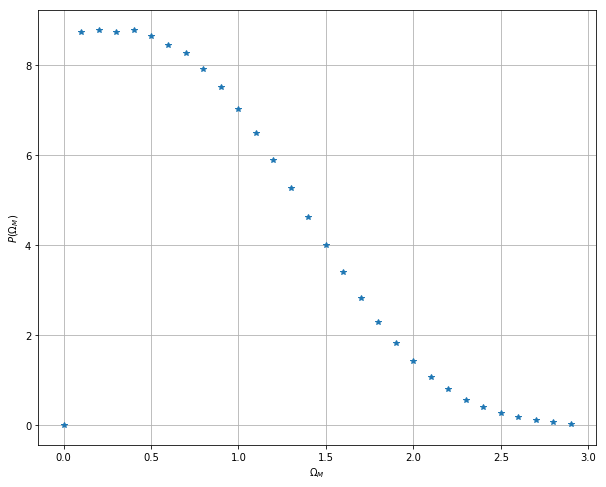

In [92]:
fig =  plt.figure(figsize=(10,8))
plt.plot(x1,P_Om,'*')
plt.ylabel('$P(\Omega_{M})$')
plt.xlabel('$\Omega_{M}$')
plt.grid()

Note que aparece un dato en (0,0) el cual no se tendrá en cuenta para el ajuste de la curva

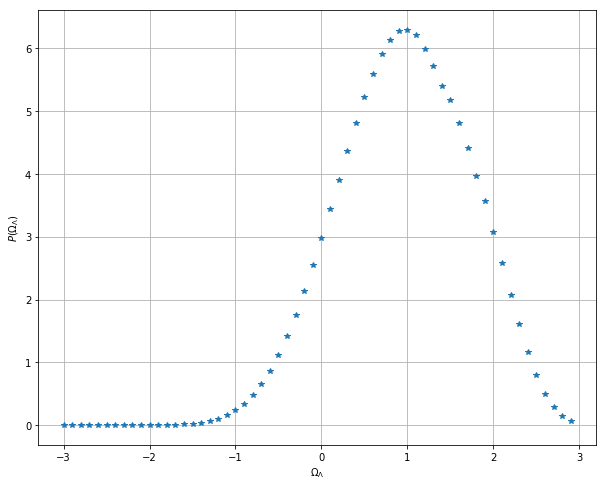

In [93]:
fig =  plt.figure(figsize=(10,8))
plt.plot(x2,P_OL,'*')
plt.ylabel('$P(\Omega_{\Lambda})$')
plt.xlabel('$\Omega_{\Lambda}$')
plt.grid()

In [95]:
# Fución Gaussiana  

def gaus(x2,a,media,std):
    return a*np.exp(-(x2-media)**2/(2*std**2))

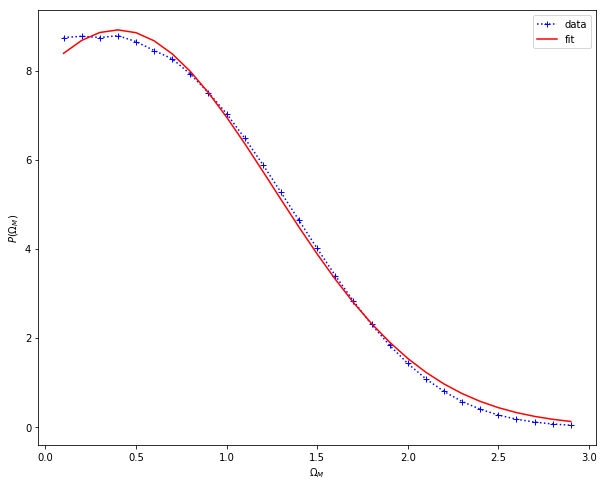

In [104]:
# AJUSTE DE LA PROBABILIDAD Om

a_m     = np.max(P_Om)        # Máxima probabilidad 
media_m = np.mean(P_Om[1:])   # Media 
std_m   = np.std(P_Om[1:])    # Desviación estandar 

# Uso de la función curve_fit de scipy 
#para ajustar la curva. "popt_m" devuelve la media y la desviación estandar 
popt_m,pcov = curve_fit(gaus,x1[1:],P_Om[1:],p0=[1,media_m,std_m])  

fig =  plt.figure(figsize=(10,8))
plt.plot(x1[1:],P_Om[1:],'b+:',label='data')
plt.plot(x1[1:],gaus(x1[1:],*popt_m),'r',label='fit')
plt.ylabel('$P(\Omega_{M})$')
plt.xlabel('$\Omega_{M}$')
plt.legend()

Media y desviación estandar de la gaussiana ajustada

In [115]:
print('P_Om: ','Media:',popt_m[1],',','Desviación estándar: ', popt_m[2])


P_Om:  Media: 0.39816925329593883 , Desviación estándar:  0.8545541604353409


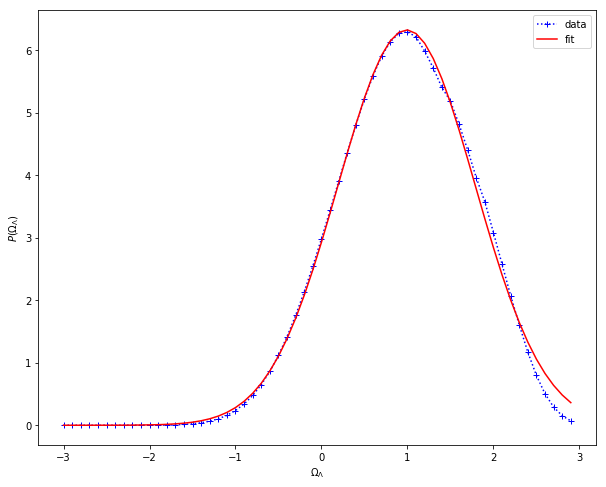

In [107]:
# AJUSTE DE LA PROBABILIDAD OL

a_L         = np.max(P_OL)
media_L     = np.mean(P_OL)
std_L       = np.std(P_OL)
popt_L,pcov = curve_fit(gaus,x2,P_OL,p0=[1,media_L,std_L])

fig =  plt.figure(figsize=(10,8))
plt.plot(x2,P_OL,'b+:',label='data')
plt.plot(x2,gaus(x2,*popt_L),'r',label='fit')
plt.ylabel('$P(\Omega_{\Lambda})$')
plt.xlabel('$\Omega_{\Lambda}$')
plt.legend()

In [116]:
print('P_Om: ','Media: ',popt_L[1], ',','Desviación estándar: ', np.abs(popt_L[2]))

P_Om:  Media:  0.9903676338140737 , Desviación estándar:  0.798130732195892


**11. Comparación de modelos**

In [236]:
# mejor par de parámetros
x = np.array([0.12,0.36])

tol = [0.01,0.05,0.9]
xnS = []
xnR = []


for i in tol:
    temp = x*i
    xnS.append(x+temp)
    xnR.append(x-temp)

xn = xnR + xnS   # datos perturbados 

In [237]:
# chi sin perturbar 
Chi_Ref = funcion_objetivo(x) 

In [249]:
# chi perturbado 
chi_p = np.zeros((6,1))
acum = 0
for i in xn: # iteración a lo largo de Omega_L 
    chi_p[acum] = funcion_objetivo(i) 
    acum = acum + 1

In [250]:
chiN = chi_p/Chi_Ref # normalización

In [257]:
# probabilidad de datos perturbados
Pp = np.exp(-chiN**2/2) 

In [252]:
# Probabilidad de los datos de referencia
Pp_ref = np.exp(-1/2)

In [256]:
# probabilidad de modelos favorecidos
V = Pp/Pp_ref